In [1]:
!pip install qiskit
!pip install qiskit qiskit-aer
!pip install pylatexenc

In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import transpile

Measurement Results:  {'11': 249, '01': 242, '10': 243, '00': 290}
     ┌───┐┌─┐   
q_0: ┤ H ├┤M├───
     ├───┤└╥┘┌─┐
q_1: ┤ H ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1 


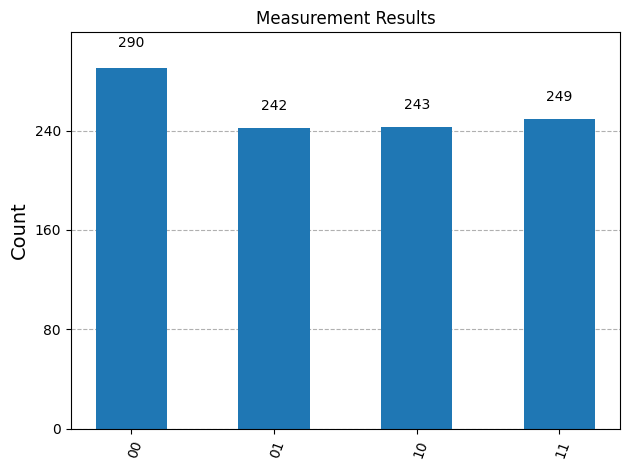

In [3]:
#Task 1 - Change gate combination
qc = QuantumCircuit(2,2)
qc.h(0)
qc.h(1)

qc.measure ([0,1],[0,1])

simulator = AerSimulator()

compiled_circuit = transpile(qc, simulator)

job = simulator.run(compiled_circuit, shots = 1024)
result = job.result()

counts = result.get_counts()

print("Measurement Results: " , counts)
print(qc.draw('text'))
display(plot_histogram(counts, title="Measurement Results"))




Measurement Results if X is applied on second qubit:  {'11': 249, '01': 242, '10': 243, '00': 290}
          ┌─┐   
q_0: ─────┤M├───
     ┌───┐└╥┘┌─┐
q_1: ┤ X ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1 


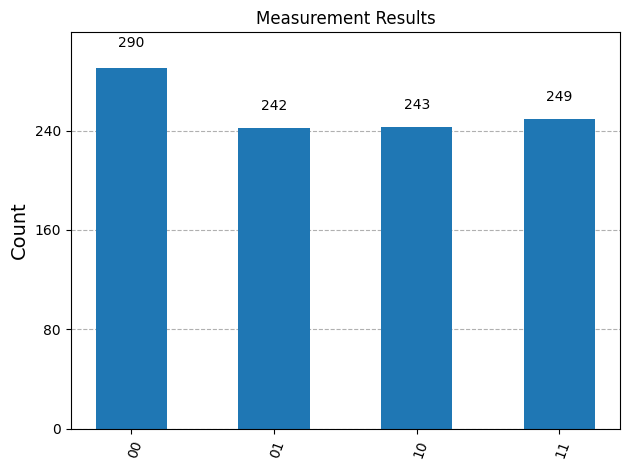

Measurement Results if X is applied on 1st qubit:  {'01': 1024}
     ┌───┐┌─┐
q_0: ┤ X ├┤M├
     └┬─┬┘└╥┘
q_1: ─┤M├──╫─
      └╥┘  ║ 
c: 2/══╩═══╩═
       1   0 


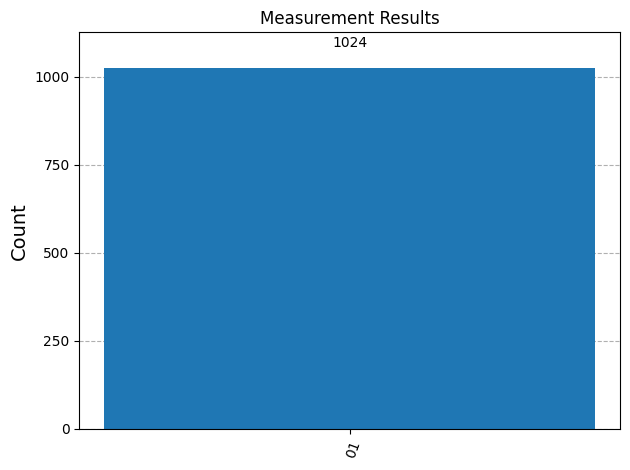

In [4]:
#Second task - Swap Qubit Roles

qc1 = QuantumCircuit(2, 2)
qc1.x(1)

qc1.measure([0,1],[0,1])

simulator = AerSimulator()

compiled_circuit1 = transpile(qc1, simulator)

job = simulator.run(compiled_circuit1, shots = 1024)
result1 = job.result()

counts1 = result.get_counts()

print("Measurement Results if X is applied on second qubit: " , counts1)

print(qc1.draw('text'))
display(plot_histogram(counts1, title="Measurement Results"))


qc2 = QuantumCircuit(2, 2)
qc2.x(0)

qc2.measure([0,1],[0,1])

simulator = AerSimulator()

compiled_circuit2 = transpile(qc2, simulator)

job = simulator.run(compiled_circuit2, shots = 1024)
result2 = job.result()

counts2 = result2.get_counts()

print("Measurement Results if X is applied on 1st qubit: ", counts2)

print(qc2.draw('text'))
display(plot_histogram(counts2, title="Measurement Results"))

Measurement Results:  {'11': 269, '01': 230, '10': 259, '00': 266}
     ┌───┐┌─┐   
q_0: ┤ H ├┤M├───
     ├───┤└╥┘┌─┐
q_1: ┤ H ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1 


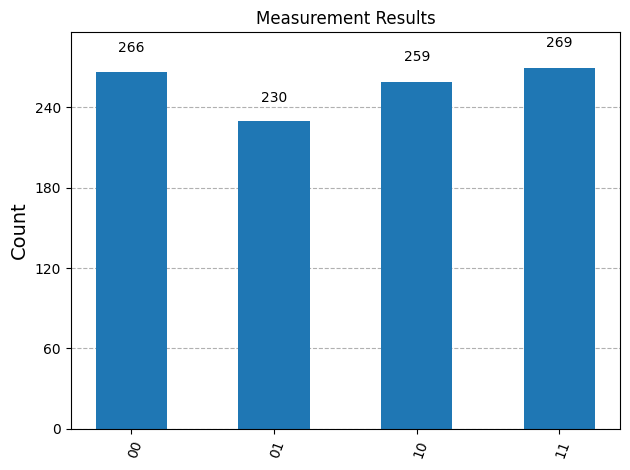

In [5]:
#Task 3 - Adding CNOT gate

qc3 = QuantumCircuit(2,2)
qc3.h(0)
qc3.cx(0, 1)

qc3.measure ([0,1],[0,1])

simulator = AerSimulator()

compiled_circuit3 = transpile(qc, simulator)

job3 = simulator.run(compiled_circuit3, shots = 1024)
result3 = job3.result()

counts3 = result3.get_counts()

print("Measurement Results: " , counts3)
print(qc.draw('text'))
display(plot_histogram(counts3, title="Measurement Results"))




Measurement Results:  {'01': 4096}
     ┌───┐┌─┐
q_0: ┤ X ├┤M├
     └┬─┬┘└╥┘
q_1: ─┤M├──╫─
      └╥┘  ║ 
c: 2/══╩═══╩═
       1   0 


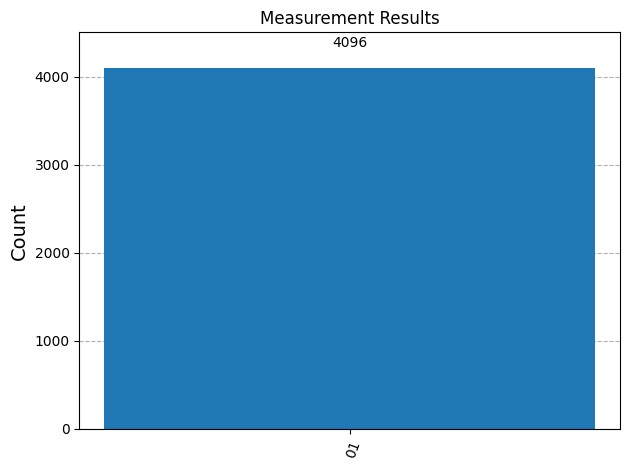

In [6]:
# Task 4 - Increase measurement shots

qc4 = QuantumCircuit(2,2)
qc4.x(0)

qc4.measure([0,1],[0,1])

simulator = AerSimulator()

compiled_circuit4 = transpile(qc4, simulator)

job4 = simulator.run(compiled_circuit4, shots = 4096)
result4 = job4.result()

counts4 = result4.get_counts()

print("Measurement Results: " , counts4)
print(qc4.draw('text'))
display(plot_histogram(counts4, title="Measurement Results"))

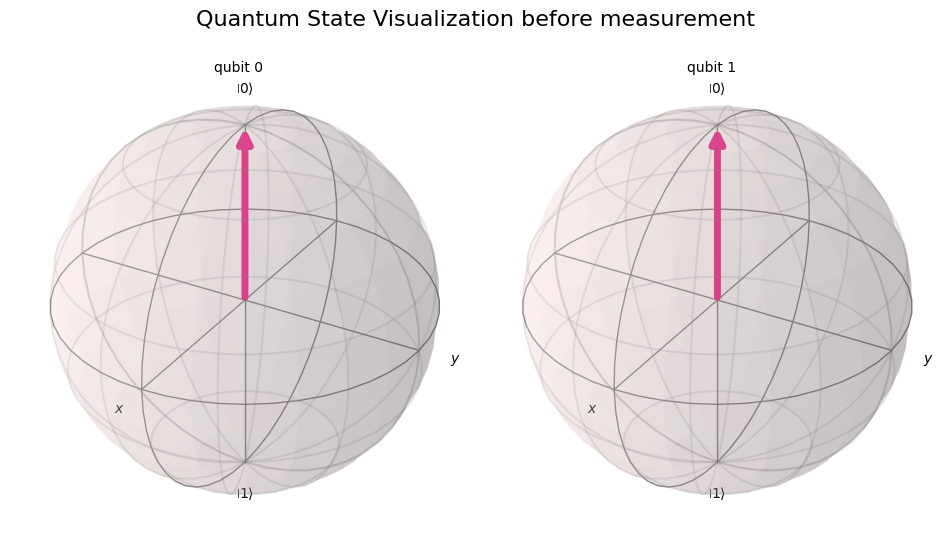

     ┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ H ├
     └───┘


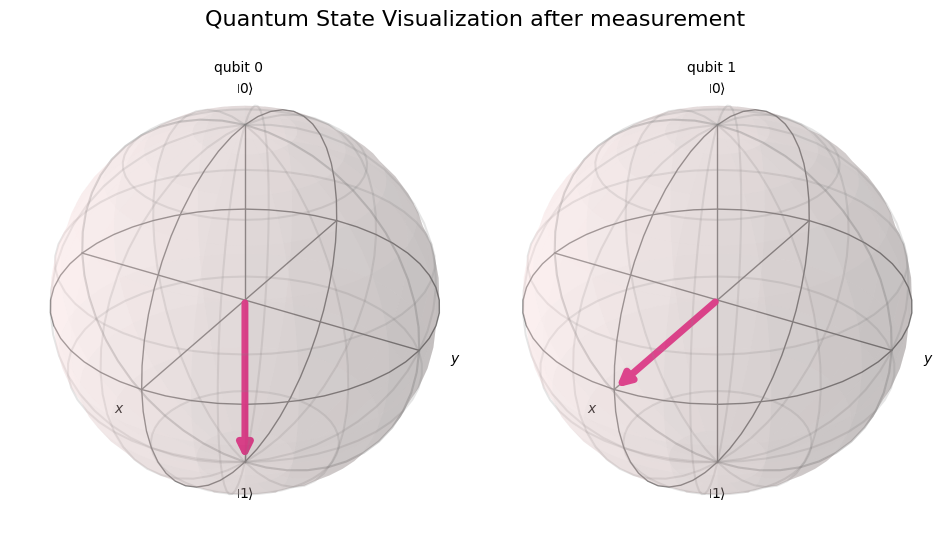

In [7]:
#Task 5 - Add a new visualization
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

qc_state = QuantumCircuit(2)

state = Statevector.from_instruction(qc_state)




display(plot_bloch_multivector(state, title="Quantum State Visualization before measurement"))
qc_state.x(0)
qc_state.h(1)
state = Statevector.from_instruction(qc_state)
print(qc_state.draw('text'))
display(plot_bloch_multivector(state, title="Quantum State Visualization after measurement"))